### Pools of Pittsburgh

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

In [3]:
# load data from file
pools = pd.read_csv("https://data.wprdc.org/datastore/dump/5cc254fe-2cbd-4912-9f44-2f95f0beea9a", index_col = "neighborhood")
pools.head(30)

,id,name,type,retired,water_source,capacity,image,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
neighborhood,,,,,,,,,,,,,,,,
Bedford Dwellings,899591542,Ammon,Pool,NaN,Pittsburgh Water and Sewer Authority,538000.0,https://tools.wprdc.org/images/pittsburgh/pool...,6,5,42003050900,3,5,2,2-5,40.448720,-79.978325
Banksville,1003800828,Banksville,Pool,NaN,Pennsylvania American Water,166320.0,https://tools.wprdc.org/images/pittsburgh/pool...,2,20,42003202300,5,20,6,4-9,40.414758,-80.040551
Beechview,1688544652,Beechview Spray Park,Spray Park,NaN,Pennsylvania American Water,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,4,19,42003191600,5,19,6,4-28,40.414989,-80.019170
Bloomfield,1533382756,Bloomfield,Pool,NaN,Pittsburgh Water and Sewer Authority,335000.0,https://tools.wprdc.org/images/pittsburgh/pool...,7,8,42003080200,2,8,5,3-1,40.461989,-79.953310
Hazelwood,1287441950,Burgwin Spray Park,Spray Park,NaN,Pittsburgh Water and Sewer Authority,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,5,15,42003562300,3,15,4,2-13,40.405065,-79.936896
Troy Hill,168387727,Cowley Spray Park,Spray Park,NaN,Pittsburgh Water and Sewer Authority,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,1,24,42003240600,1,24,1,1-2,40.458739,-79.988366
East Hills,1569871328,East Hills Spray Park,Spray Park,NaN,Wilkinsburg Penn,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,9,13,42003130600,2,13,5,3-19,40.453091,-79.871036
Highland Park,1475037865,Highland - Children,Pool,NaN,Pittsburgh Water and Sewer Authority,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,7,11,42003980100,2,11,5,3-9,40.482011,-79.911280
Highland Park,5446687,Highland - Main,Pool,NaN,Pittsburgh Water and Sewer Authority,560242.0,https://tools.wprdc.org/images/pittsburgh/pool...,7,11,42003980100,2,11,5,3-9,40.482170,-79.910927


This table organizes all the data from the Pittsbrugh Pools dataset by neighborhood.

In [4]:
# dropped unnecessary columns from the data leaving only capacity column left
pools2 = pools.drop(['id','name','type','retired', 'water_source', 'image', 'council_district', 'ward', 'tract', 'public_works_division', 'pli_division', 'police_zone', 'fire_zone', 'latitude', 'longitude'], axis=1)
pools2.head(30)

,capacity
neighborhood,
Bedford Dwellings,538000.0
Banksville,166320.0
Beechview,NaN
Bloomfield,335000.0
Hazelwood,NaN
Troy Hill,NaN
East Hills,NaN
Highland Park,NaN
Highland Park,560242.0


Now I removed all of the unnecessary columns for our analysis. After doing this, I was only left with the capacity and neighborhood columns.

In [5]:
# now need to remove any rows that have a NaN capacity 
pools2 = pools2.dropna()
pools2.head(30)

,capacity
neighborhood,
Bedford Dwellings,538000.0
Banksville,166320.0
Bloomfield,335000.0
Highland Park,560242.0
Homewood South,171075.0
Brighton Heights,205800.0
Greenfield,195000.0
Lincoln Place,18000.0
Brookline,417657.0


From the table before, I noticed that some of the pools have NaN capacity. Upon further investigation, I realizedthat those pools are spray parks or children pools. I do not want to include those pools in our analysis because I want to determine the best pool among actual pools made for adults. So, I dropped the NaN rows and created a new table for better visualization.

Text(0, 0.5, 'Pool Capacity (in gallons)')

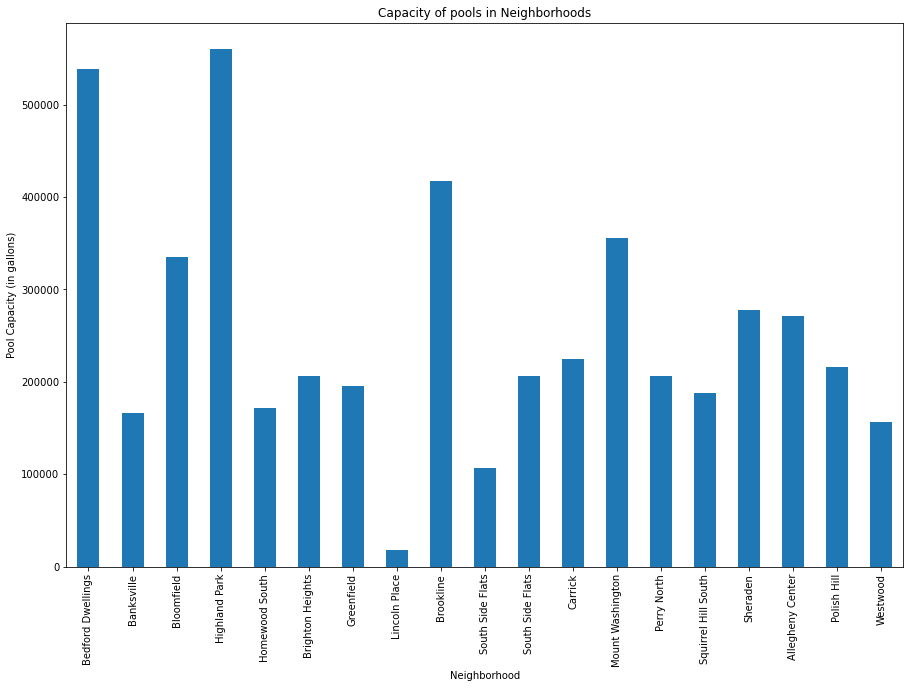

In [6]:
#plotting the data to get a better visual
poolPlot = pools2.plot.bar(legend=False, figsize = (15,10))
plt.xlabel("Neighborhood")
plt.title("Capacity of pools in Neighborhoods")
plt.ylabel("Pool Capacity (in gallons)")

This is a bar graph of all the applicable Pittsburgh pools and their corresponding capacity (in gallons)

Text(0, 0.5, 'Pool Capacity (in gallons)')

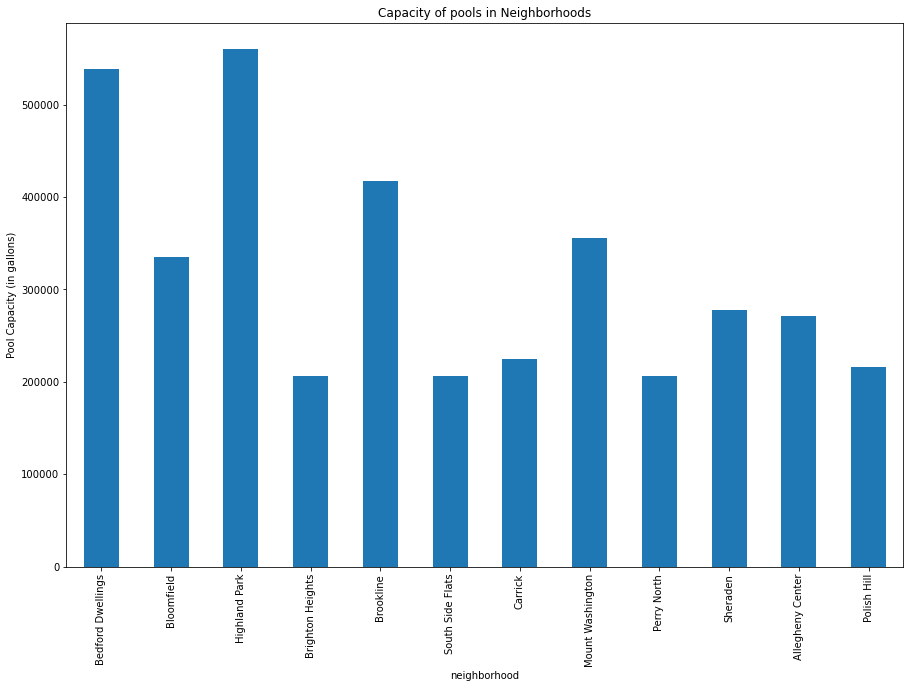

In [6]:
#narrowdown the capacity to be above 200000
greaterThan2 = pools2.loc[pools2['capacity'] > 200000]
greaterThan2.plot.bar(legend=False, figsize = (15,10))
plt.xlabel("neighborhood")
plt.title("Capacity of pools in Neighborhoods")
plt.ylabel("Pool Capacity (in gallons)")

In order to find the largest pool, I narrowed it down so that only the pools greater than 200000 gallons were graphed.

Text(0, 0.5, 'Pool Capacity (in gallons)')

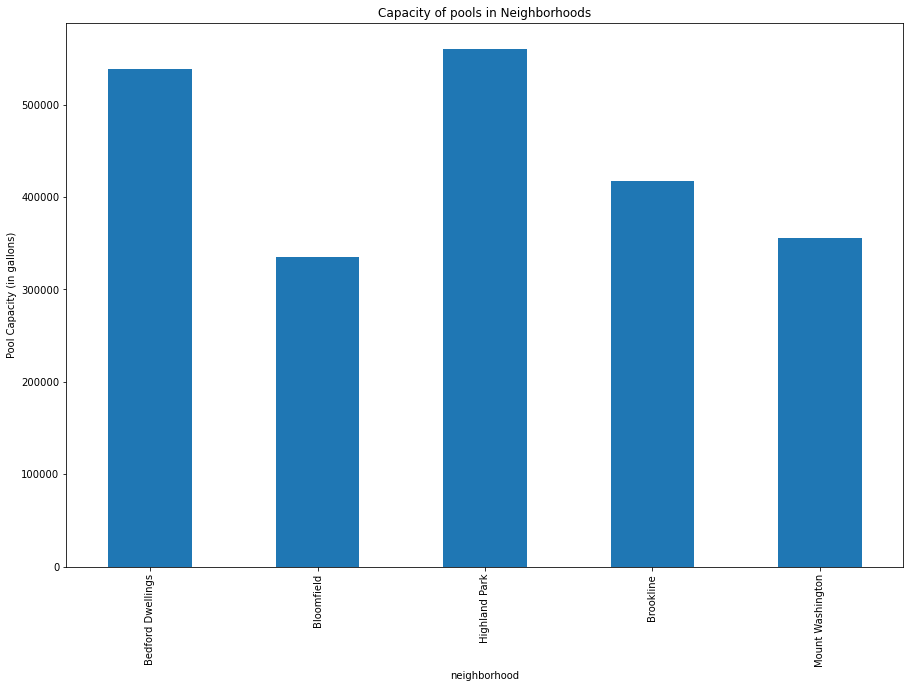

In [7]:
#plotting data for capacity greater than 300000
greaterThan3 = pools2.loc[pools2['capacity'] > 300000]
greaterThan3.plot.bar(legend=False, figsize = (15,10))
plt.xlabel("neighborhood")
plt.title("Capacity of pools in Neighborhoods")
plt.ylabel("Pool Capacity (in gallons)")

The graph before did not narrow down the pools enough, so I narrowed the pools even further and decided to graph the pools with a capacity greater than 300000 gallons

In [8]:
greaterThan3.sort_values("capacity", ascending=False).head

<bound method NDFrame.head of                    capacity
neighborhood               
Highland Park      560242.0
Bedford Dwellings  538000.0
Brookline          417657.0
Mount Washington   356000.0
Bloomfield         335000.0>

Lastly, I sorted the final graphs values from descending order to gain a better understanding of which pool in each neighborhood have the largest capacity in gallons.

### The Results

The pool with the largest capacity in gallons is located in Highland Park with 560242 gallons. Bedford Dwellings follows for second place at 538000 gallons, and Brookline comes in third at 417657 gallons. Due to this, based on my data, I believe Highland Park is the best neighborhood because it has the largest pool capacity in gallons